In [11]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
from sklearn import datasets

In [12]:
from tensorflow.python.framework import ops
ops.reset_default_graph()
sess = tf.Session()

In [15]:
iris = datasets.load_iris()
x_vals = np.array([[x[0], x[3]] for x in iris.data])
y_vals = np.array([1 if y==0 else -1 for y in iris.target])

train_indices = np.random.choice(len(x_vals), round(len(x_vals)*0.8), replace=False)
train_indices

array([ 60, 107,  11,  18,   3,  55, 115,  42, 138, 124,  79, 149, 129,
       125, 111,  54,  52, 103,  31,  29,  75,  26, 131, 108,  65,  90,
        39,  88, 117, 106, 100,  44,  20,  78,  24, 105, 102,  97,  34,
       121,  37,  99,  85,  91, 122,  58,  59,  98,  12, 118,  21, 135,
        49, 130,  84,  62, 144,  40,  13,  76,  80,  53,   9,   8, 141,
        46,  35,   2,  86,  25,  43,  10,  63,  15, 104,  89,  28,  66,
        87,   5,  48, 137, 120, 140,  57,  77,  92,  67,   6, 142, 134,
         7,  74,   0,  16,   4,  17,  61,  19, 114, 109, 126, 148, 133,
        22,  68, 127,  83,  47,  36,  27, 123,  73,  96, 119,  94,  51,
        41,  23,  69])

In [18]:
iris = datasets.load_iris()
x_vals = np.array([[x[0], x[3]] for x in iris.data])
y_vals = np.array([1 if y==0 else -1 for y in iris.target])

train_indices = np.random.choice(len(x_vals), round(len(x_vals)*0.8), replace=False)
test_indices = np.array(list(set(range(len(x_vals))) - set(train_indices)))
x_vals_train = x_vals[train_indices]
x_vals_test = x_vals[test_indices]
y_vals_train = y_vals[train_indices]
y_vals_test = y_vals[test_indices]

batch_size = 120
x_data = tf.placeholder(shape=[None, 2], dtype=tf.float32)
y_target = tf.placeholder(shape=[None, 1], dtype=tf.float32)
A = tf.Variable(tf.random_normal(shape=[2,1]))
b = tf.Variable(tf.random_normal(shape=[1,1]))

model_output = tf.subtract(tf.matmul(x_data, A), b)

l2_norm = tf.reduce_sum(tf.square(A))
alpha = tf.constant([0.01])
classification_term = tf.reduce_mean(tf.maximum(0., tf.subtract(1., tf.multiply(model_output, y_target))))

loss = tf.add(classification_term, tf.multiply(alpha, l2_norm))

prediction = tf.sign(model_output)
accuracy = tf.reduce_mean(tf.cast(tf.equal(prediction, y_target), tf.float32))

opt = tf.train.GradientDescentOptimizer(0.01)
train_step = opt.minimize(loss)

init = tf.global_variables_initializer()
sess.run(init)

loss_vec = []
train_accuracy = []
test_accuracy = []
for i in range(500):
    rand_index = np.random.choice(len(x_vals_train), size=batch_size)
    rand_x = x_vals_train[rand_index]
    rand_y = np.transpose([y_vals_train[rand_index]])
    sess.run(train_step, feed_dict={x_data: rand_x, y_target: rand_y})
    temp_loss = sess.run(loss, feed_dict={x_data: rand_x, y_target: rand_y})
    loss_vec.append(temp_loss)
    train_acc_temp = sess.run(accuracy, feed_dict={x_data: x_vals_train, y_target: np.transpose([y_vals_train])})
    train_accuracy.append(train_acc_temp)
    test_acc_temp = sess.run(accuracy, feed_dict={x_data: x_vals_test, y_target: np.transpose([y_vals_test])})
    test_accuracy.append(test_acc_temp)
    if (i+1) % 100 == 0:
        print('Step #{}: A={}, b={}, Loss={}'.format(str(i+1), str(sess.run(A)), str(sess.run(b)), str(temp_loss)))

Step #100: A=[[ 0.05264405]
 [-0.45984367]], b=[[0.5986188]], Loss=[0.5725094]
Step #200: A=[[ 0.10094437]
 [-0.720725  ]], b=[[0.53578556]], Loss=[0.46361527]
Step #300: A=[[ 0.14256488]
 [-0.9750063 ]], b=[[0.47453544]], Loss=[0.30498818]
Step #400: A=[[ 0.21518551]
 [-1.2224385 ]], b=[[0.4065355]], Loss=[0.3414881]
Step #500: A=[[ 0.24615899]
 [-1.4744872 ]], b=[[0.34495217]], Loss=[0.2489161]


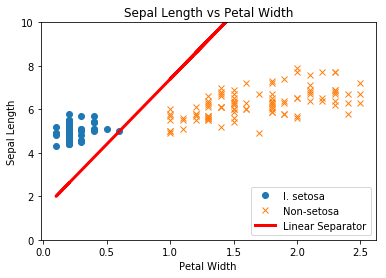

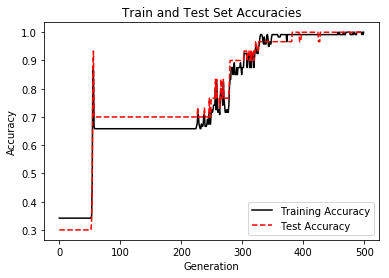

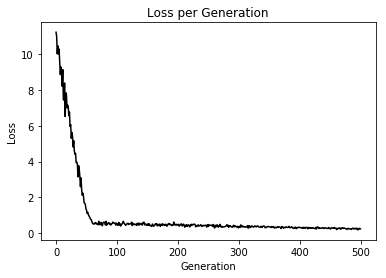

In [19]:
[[a1], [a2]] = sess.run(A)
[[b]] = sess.run(b)
slope = -a2/a1
y_intercept = b/a1
x1_vals = [d[1] for d in x_vals]
best_fit = []
for i in x1_vals:
    best_fit.append(slope*i+y_intercept)
    setosa_x = [d[1] for i,d in enumerate(x_vals) if y_vals[i]==1]
    setosa_y = [d[0] for i,d in enumerate(x_vals) if y_vals[i]==1]
    not_setosa_x = [d[1] for i,d in enumerate(x_vals) if y_vals[i]==-1]
    not_setosa_y = [d[0] for i,d in enumerate(x_vals) if y_vals[i]==-1]

plt.plot(setosa_x, setosa_y, 'o', label='I. setosa')
plt.plot(not_setosa_x, not_setosa_y, 'x', label='Non-setosa')
plt.plot(x1_vals, best_fit, 'r-', label='Linear Separator', linewidth=3)
plt.ylim([0, 10])
plt.legend(loc='lower right')
plt.title('Sepal Length vs Petal Width')
plt.xlabel('Petal Width')
plt.ylabel('Sepal Length')
plt.show()
plt.plot(train_accuracy, 'k-', label='Training Accuracy')
plt.plot(test_accuracy, 'r--', label='Test Accuracy')
plt.title('Train and Test Set Accuracies')
plt.xlabel('Generation')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()
plt.plot(loss_vec, 'k-')
plt.title('Loss per Generation')
plt.xlabel('Generation')
plt.ylabel('Loss')
plt.show()